demo

In [99]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow import keras

In [100]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

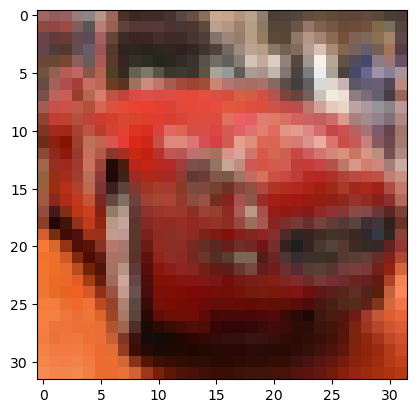

In [101]:
plt.imshow(x_train[5])
plt.show()

In [102]:
n=np.unique(y_train)
n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [103]:
n=10
x_train.shape

(50000, 32, 32, 3)

In [104]:
#preprocessing
y_train=to_categorical(y_train,n)
y_test=to_categorical(y_test,n)

In [105]:
x_train=x_train/255
x_test=x_test/255
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [106]:
model=Sequential()


In [107]:
model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

C:\Users\smara\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

In [109]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [110]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
help(model.fit)

Help on method fit in module keras.src.backend.tensorflow.trainer:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1) method of keras.src.models.sequential.Sequential instance
    Trains the model for a fixed number of epochs (dataset iterations).

    Args:
        x: Input data. It could be:
            - A NumPy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
            - A tensor, or a list of tensors
            (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
            - A `tf.data.Dataset`. Should return a tuple
            of either `(inputs, targets)` or
            `(inputs, targets, s

In [111]:
history=model.fit(x_train,y_train,batch_size=30,validation_data=(x_test,y_test),epochs=3,shuffle=True)

Epoch 1/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 76s 42ms/step - accuracy: 0.3827 - loss: 1.6884 - val_accuracy: 0.5972 - val_loss: 1.1524
Epoch 2/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 75s 45ms/step - accuracy: 0.6087 - loss: 1.1143 - val_accuracy: 0.6456 - val_loss: 1.0065
Epoch 3/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.6601 - loss: 0.9698 - val_accuracy: 0.6836 - val_loss: 0.9058


In [112]:
help(model.evaluate)

Help on method evaluate in module keras.src.backend.tensorflow.trainer:

evaluate(x=None, y=None, batch_size=None, verbose='auto', sample_weight=None, steps=None, callbacks=None, return_dict=False, **kwargs) method of keras.src.models.sequential.Sequential instance
    Returns the loss value & metrics values for the model in test mode.

    Computation is done in batches (see the `batch_size` arg.)

    Args:
        x: Input data. It could be:
            - A NumPy array (or array-like), or a list of arrays
                (in case the model has multiple inputs).
            - A tensor, or a list of tensors
                (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding array/tensors,
                if the model has named inputs.
            - A `tf.data.Dataset`. Should return a tuple
                of either `(inputs, targets)` or
                `(inputs, targets, sample_weights)`.
            - A generator or `keras.utils.Py

In [113]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6820 - loss: 0.9061


In [114]:
print(test_loss)


0.9058188199996948


In [115]:
print(test_acc)

0.6836000084877014


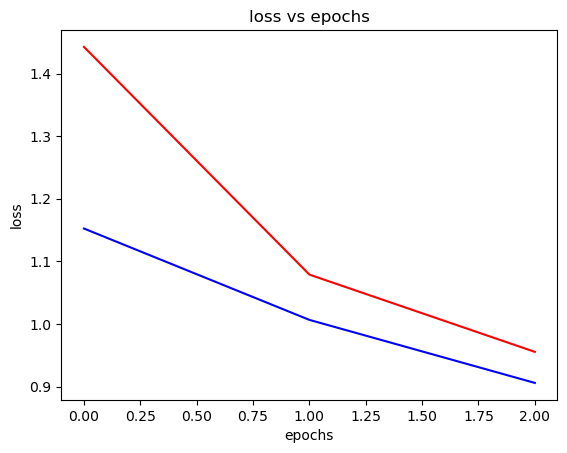

In [116]:
#plot1
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.show()

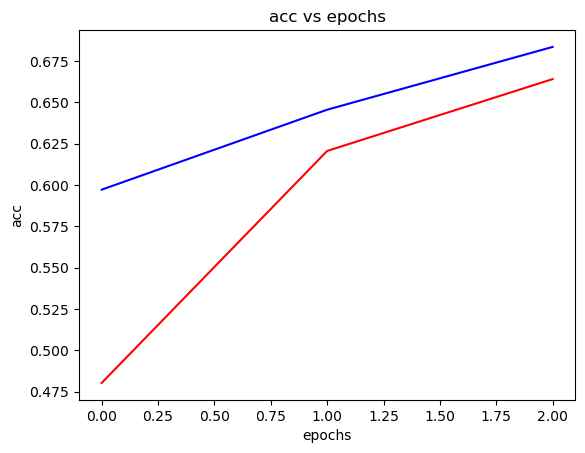

In [117]:
#plot2
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title('acc vs epochs')
plt.show()

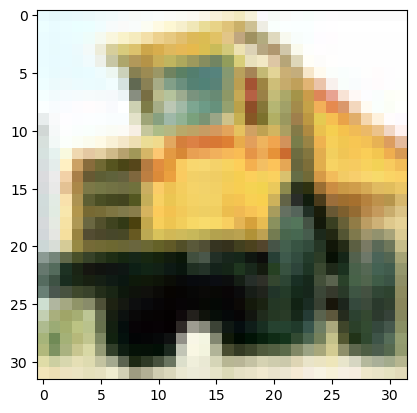

In [118]:
n=400
plt.imshow(x_test[n])
plt.show()

In [119]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [120]:
pred_values=model.predict(x_test)
print(class_names[np.argmax(pred_values[n])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
truck
